In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
data = sns.load_dataset("iris")

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\user\AppData\Local\Temp\ipykernel_2792\2689199111.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json( resp.text )


<Axes: xlabel='年', ylabel='人數(萬)'>

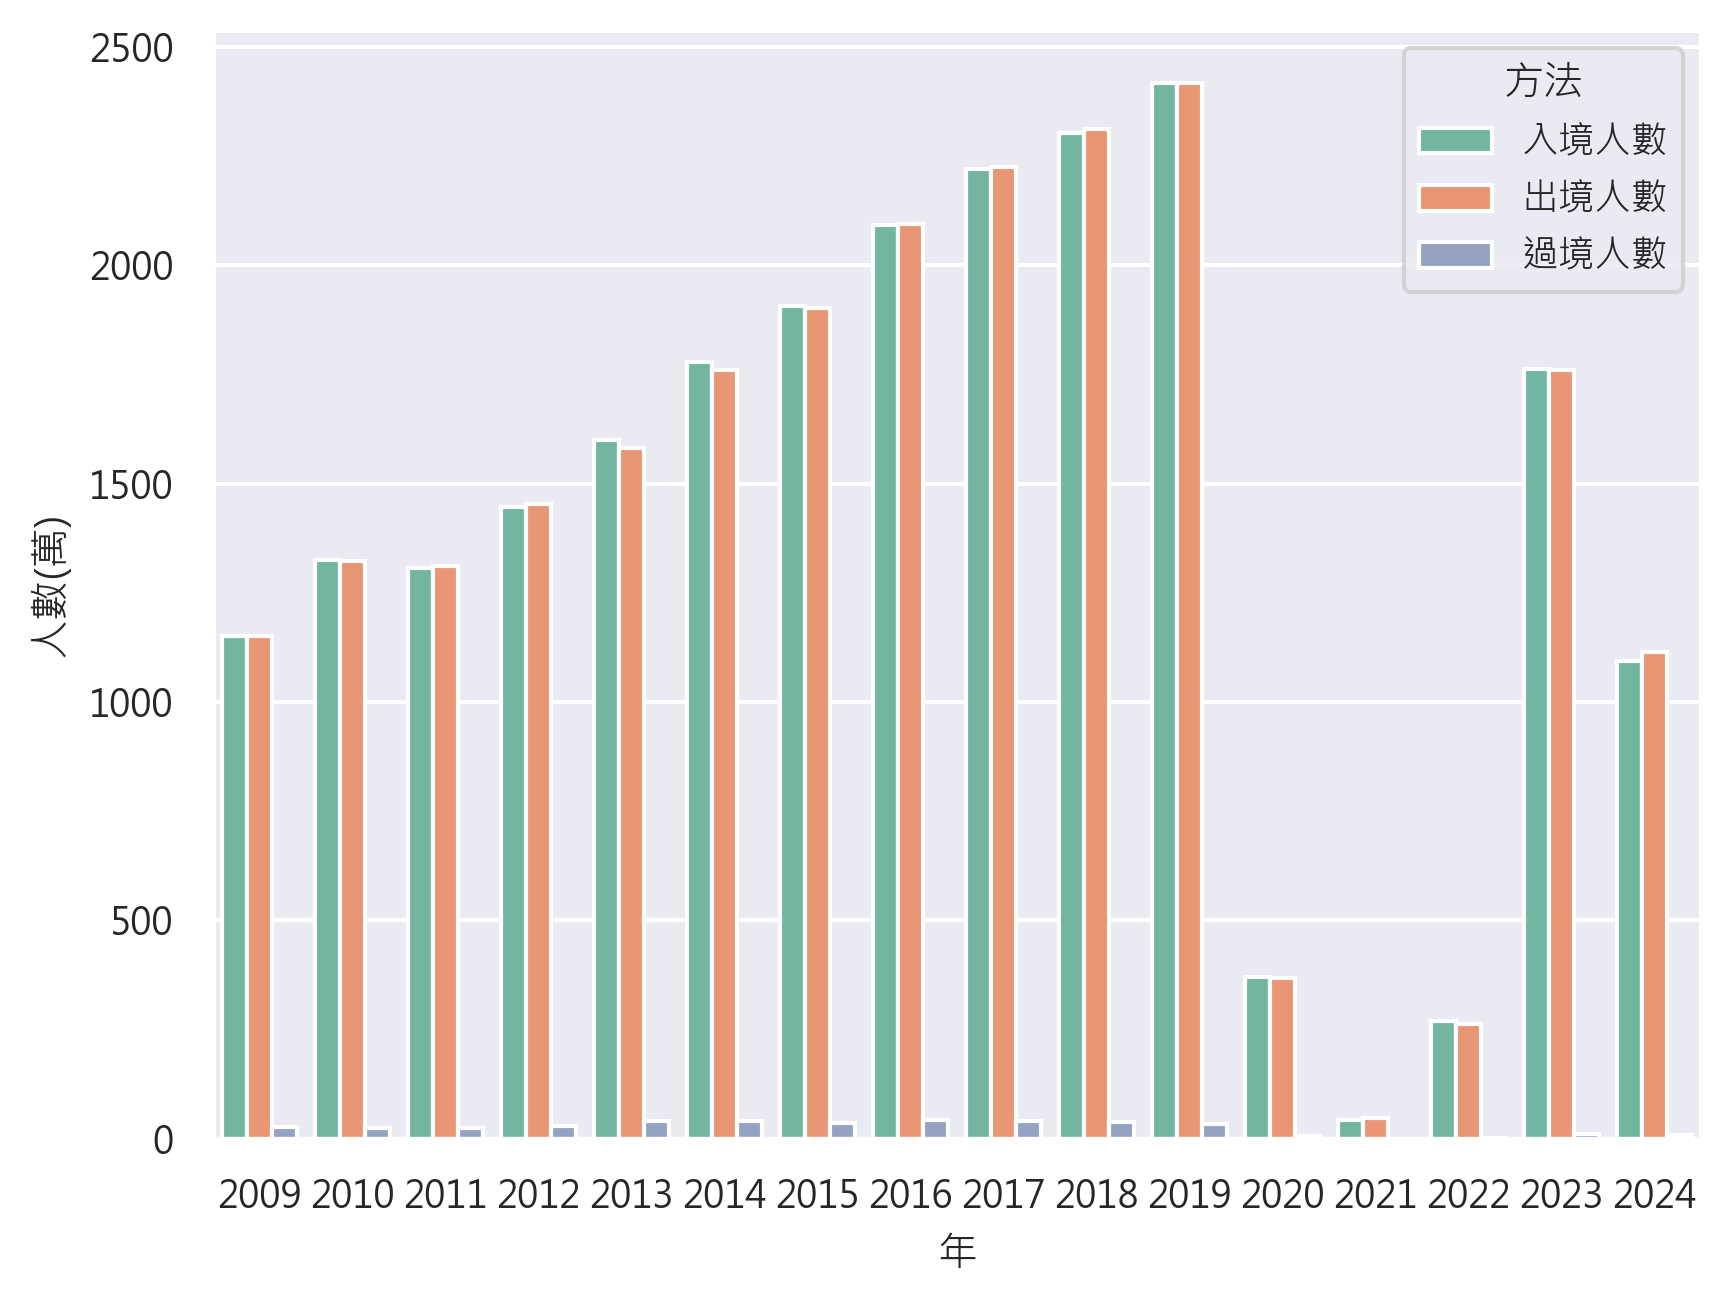

In [2]:
import requests
import pandas as pd
import seaborn as sns

sns.set_theme(rc={'figure.dpi':300, 'font.sans-serif': 'Microsoft JhengHei'}, font_scale=0.8, palette='Set2')
url = 'https://www.taoyuan-airport.com/api/api/statistics/passenger/year'

payload = {"type":["入境","出境","過境"],
           "query":"new"}

resp = requests.post( url, data=payload )
df = pd.read_json( resp.text )
df.columns = ['年', '入境人數','出境人數','過境人數','totle']

df = df.drop('totle',axis=1)

df_long = df.melt(id_vars='年', var_name='方法', value_name='人數')
df_long['人數(萬)'] = df_long['人數']/10000
sns.barplot(data=df_long, x='年', y='人數(萬)', hue='方法')
    

C:\Users\user\AppData\Local\Temp\ipykernel_6988\4174790393.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(resp.text)


<Axes: title={'center': '桃園機場近幾年出入境人數統計圖'}, xlabel='年', ylabel='人數(萬)'>

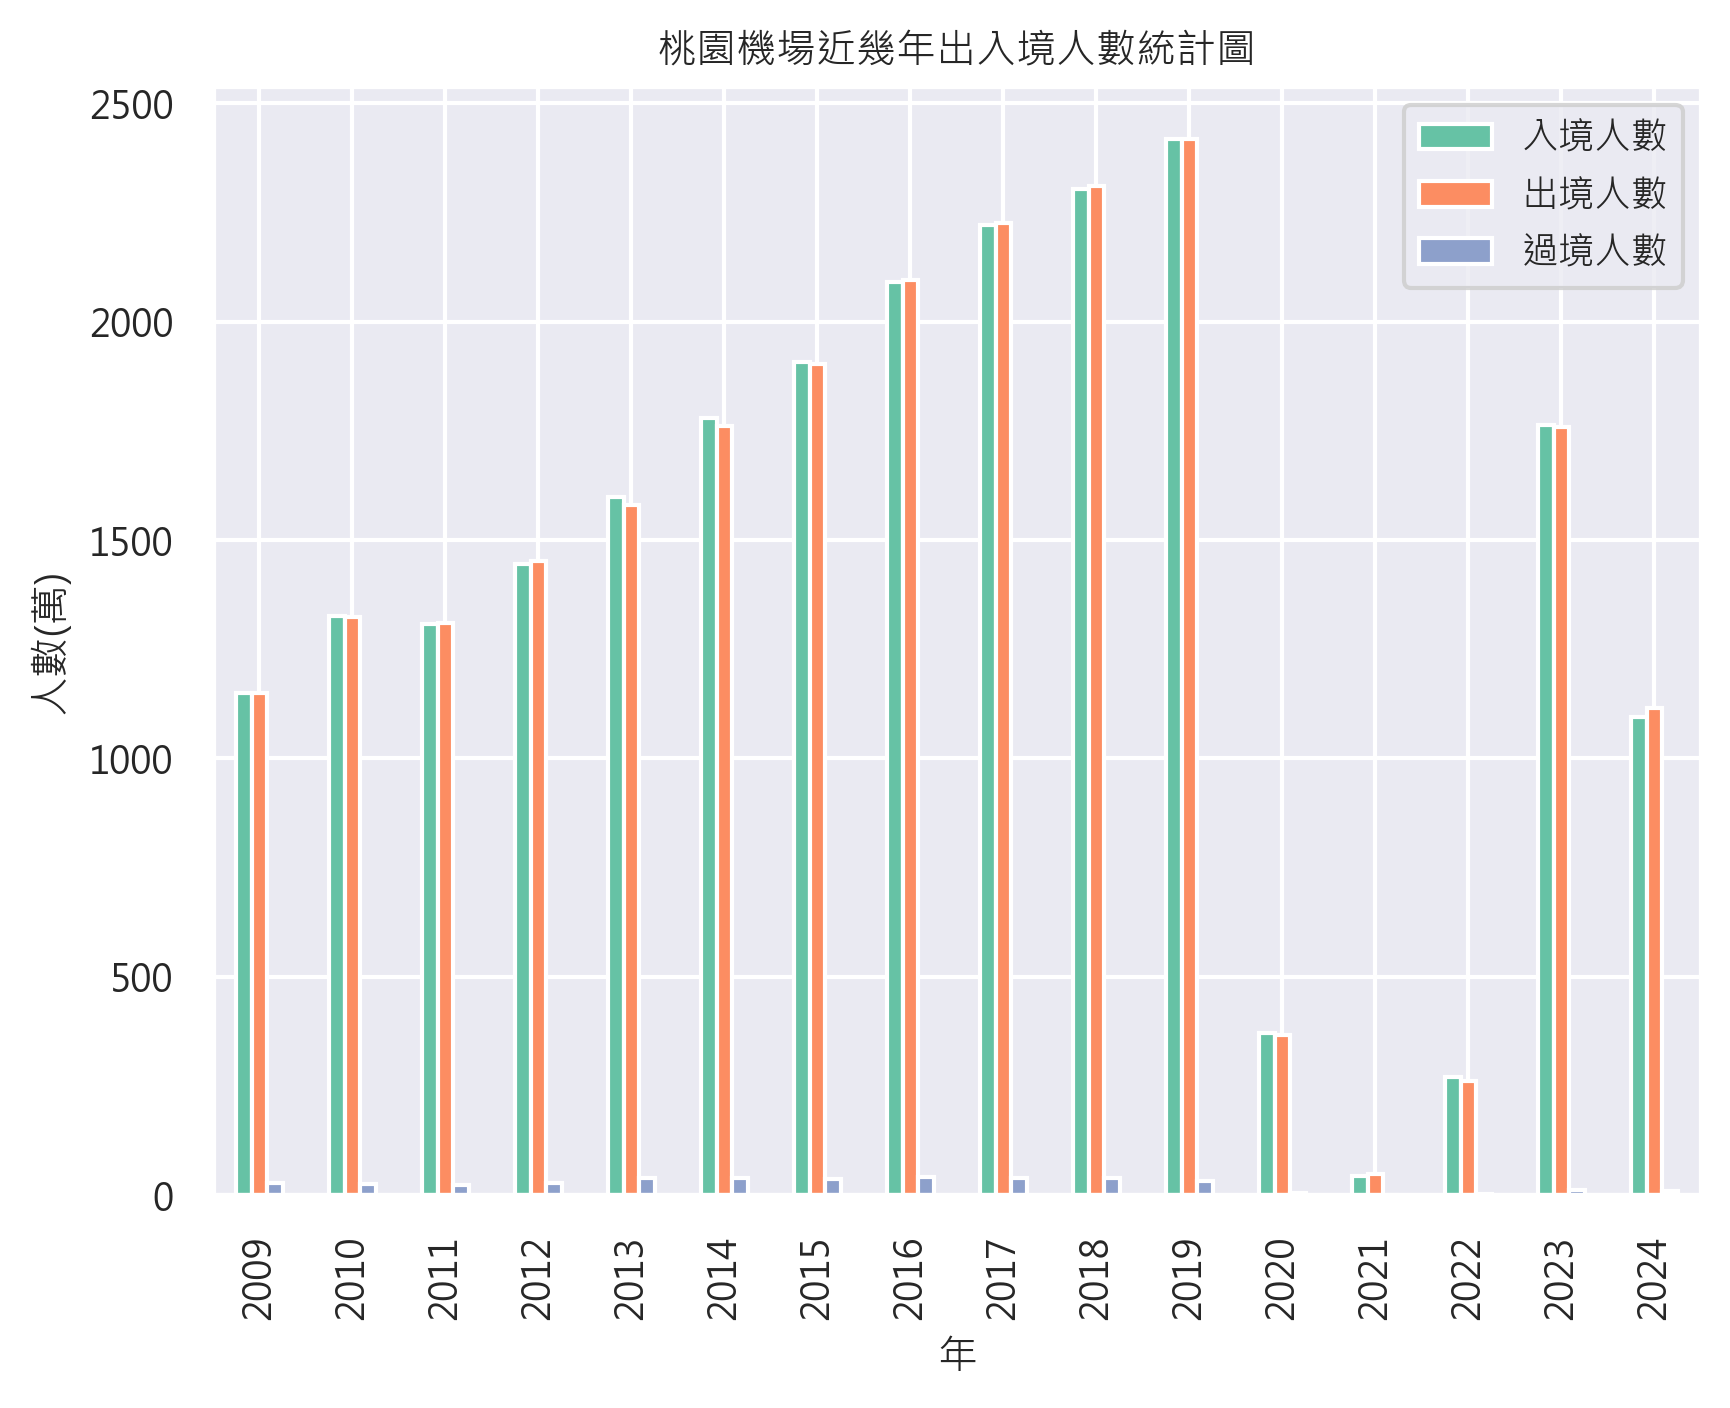

In [1]:
import requests
import pandas as pd
import seaborn as sns

sns.set_theme(
    rc={"figure.dpi": 300, "font.sans-serif": "Microsoft JhengHei"},
    font_scale=0.8,
    palette="Set2",
)
url = "https://www.taoyuan-airport.com/api/api/statistics/passenger/year"

payload = {"type": ["入境", "出境", "過境"], "query": "new"}

resp = requests.post(url, data=payload)
df = pd.read_json(resp.text)
df.columns = ["年", "入境人數", "出境人數", "過境人數", "totle"]

df = df.drop("totle", axis=1)

df = df.set_index("年")
df["入境人數"] /= 10000  # df['入境人數'] = df['入境人數']/10000
df["出境人數"] /= 10000
df["過境人數"] /= 10000
df.plot.bar(ylabel="人數(萬)", title="桃園機場近幾年出入境人數統計圖")
